# Data Analysis and Visualisation

## Dataset of diamonds

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
from matplotlib import style

In [2]:
#finding our file location 
dataset = "C:/Users/DELL/Desktop/Diamonds"
os.listdir(dataset)

['data_cushion.csv',
 'data_emerald.csv',
 'data_heart.csv',
 'data_oval.csv',
 'data_radiant.csv',
 'data_round.csv']

In [5]:
#combining all csv files to make one csv file
path = "C:/Users/DELL/Desktop/Diamonds"
files = [file for file in os.listdir(path) if not file.startswith('.')]
all_product_data = pd.DataFrame()
for file in files:
    my_data = pd.read_csv(path+"/"+file)
    all_product_data = pd.concat([all_product_data , my_data ])
all_product_data.to_csv('all_data.csv',index=False)     #  "all_data.csv" is the file having all files combined together

In [8]:
#reading are csv file
all_data = pd.read_csv('all_data.csv')
all_data.head()

,Id,Shape,Weight,Clarity,Colour,Cut,Polish,Symmetry,Fluorescence,Messurements,Price,Data Url
0,1771083,CUSHION,0.43,SI1,M,EX,EX,VG,M,4.38-4.34×2.72,683.22,https://capitalwholesalediamonds.com/product/0...
1,1524552,CUSHION,0.52,VS1,S-T,EX,EX,VG,M,4.55-4.38×2.97,718.92,https://capitalwholesalediamonds.com/product/0...
2,1651023,CUSHION,0.50,SI1,M,EX,EX,VG,F,4.86-4.23×2.87,725.32,https://capitalwholesalediamonds.com/product/0...
3,1632749,CUSHION,0.50,VS2,M,VG,EX,GD,N,4.51-4.47×2.98,771.13,https://capitalwholesalediamonds.com/product/0...
4,1660174,CUSHION,0.50,VVS2,M,EX,EX,VG,F,4.94-4.27×2.88,772.88,https://capitalwholesalediamonds.com/product/0...


In [9]:
#finding empty spaces in our data
all_data.isnull().sum()     #isnull is used to find empty spaces in our data

Id              0
Shape           0
Weight          0
Clarity         5
Colour          0
Cut             0
Polish          0
Symmetry        0
Fluorescence    0
Messurements    0
Price           0
Data Url        0
dtype: int64

In [10]:
#to see unique values
all_data.nunique()

Id              2476
Shape              6
Weight            88
Clarity            9
Colour            20
Cut                4
Polish             4
Symmetry           4
Fluorescence       7
Messurements    2193
Price           1576
Data Url        3076
dtype: int64

In [11]:
#columns in our dataset
all_data.columns

Index(['Id', 'Shape', 'Weight', 'Clarity', 'Colour', 'Cut', 'Polish',
       'Symmetry', 'Fluorescence', 'Messurements', 'Price', 'Data Url'],
      dtype='object')

In [12]:
#droping the extra columns from our dataset
data = all_data.drop(['Clarity', 'Colour', 'Symmetry', 'Fluorescence', 'Messurements', 'Data Url'], axis=1)
data.head()

,Id,Shape,Weight,Cut,Polish,Price
0,1771083,CUSHION,0.43,EX,EX,683.22
1,1524552,CUSHION,0.52,EX,EX,718.92
2,1651023,CUSHION,0.50,EX,EX,725.32
3,1632749,CUSHION,0.50,VG,EX,771.13
4,1660174,CUSHION,0.50,EX,EX,772.88


In [13]:
#starting data analysis 
def create_plots(var, x, y):
    fig, ax = plt.subplots(figsize=(12,6))
    sns.barplot(x=x, y=y, data=var)
    plt.title('Diamond'+y, size=20)
    plt.xlabel(y, size=15)
    plt.ylabel('Quantity', size=15)
    for bar, label in enumerate(ax.patches):
        height = label.get_height()
        ax.text(bar, height+15, str(height), ha='center')
    plt.show()

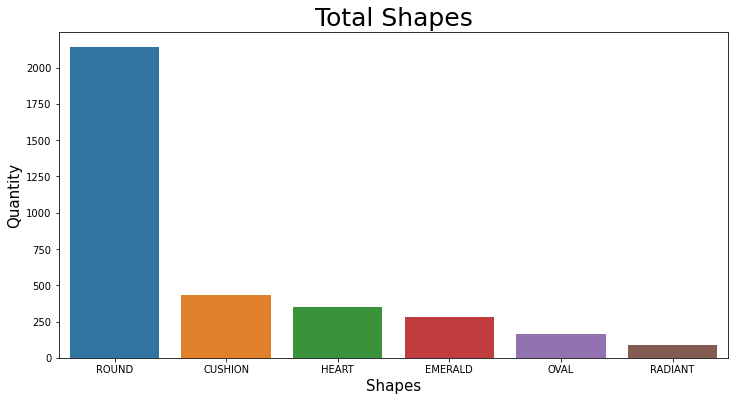

In [14]:
# for shapes column
#which shape is the most popular
plt.figure(figsize = (12,6))  #for gragh size
x = data['Shape'].value_counts().to_list()          #for x axis
y = data['Shape'].value_counts().index.to_list()    #for y axis
sns.barplot(x=y, y=x)
plt.title('Total Shapes', size=25)      #graph title
plt.xlabel('Shapes', size=15)
plt.ylabel('Quantity', size=15)
plt.show()


### Round is the most common shape which is used in our dataset 

### Radiant is the least coomon shape here

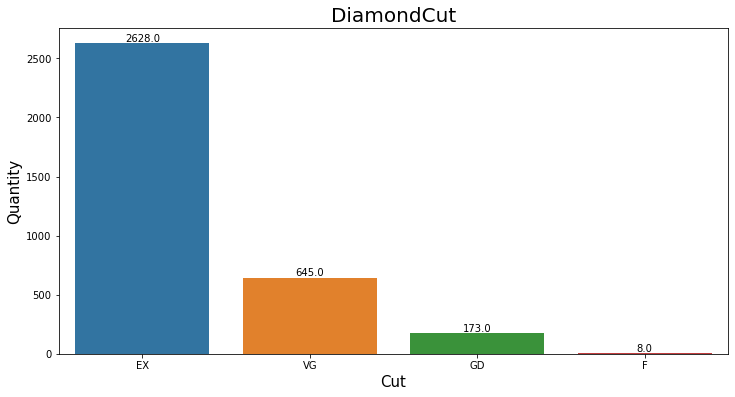

In [16]:
# defining the cut of our shape
cut = data['Cut'].value_counts().to_frame().reset_index()
create_plots(cut, 'index', 'Cut')

##### EX = Excellent
##### VG = Very Good
##### GD = Good
##### F  = Fair

# we analysed here that most of the diamonds are excellently cut

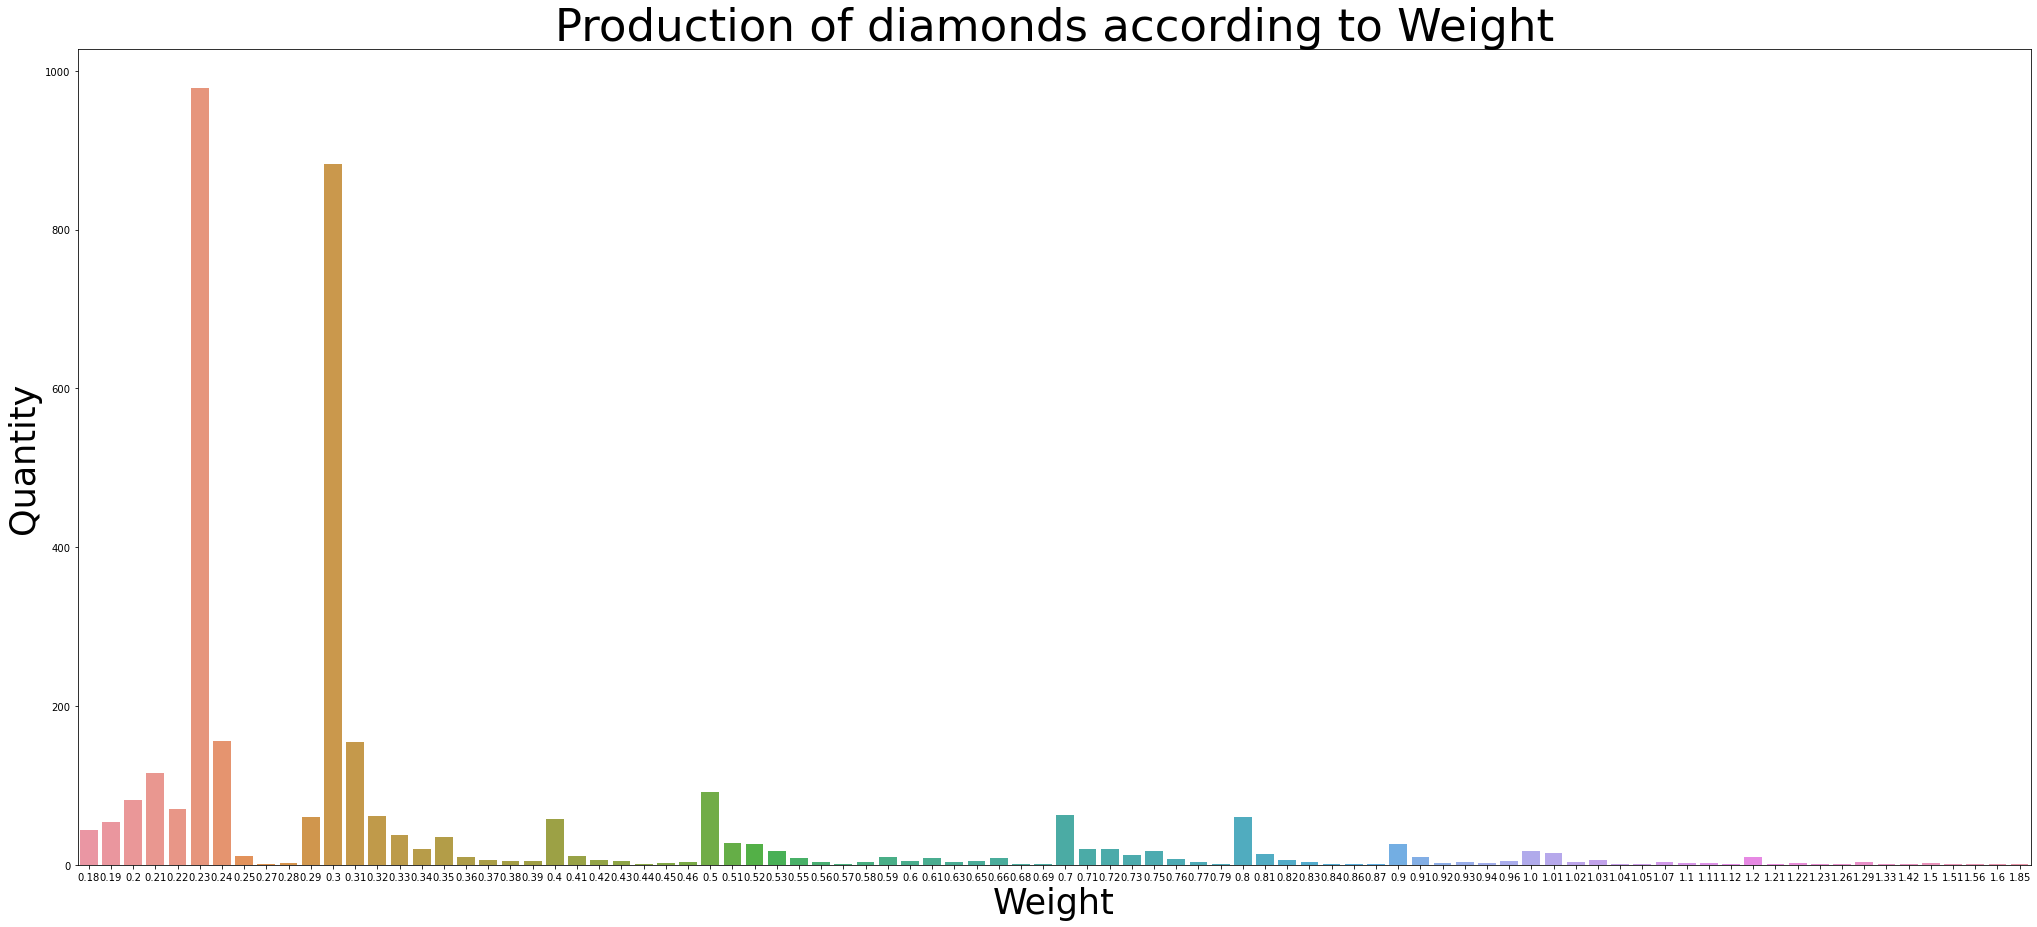

In [19]:
# anaylising diamonds throught weight



### lighter weight diamonds are commomnly seen in our dataset 

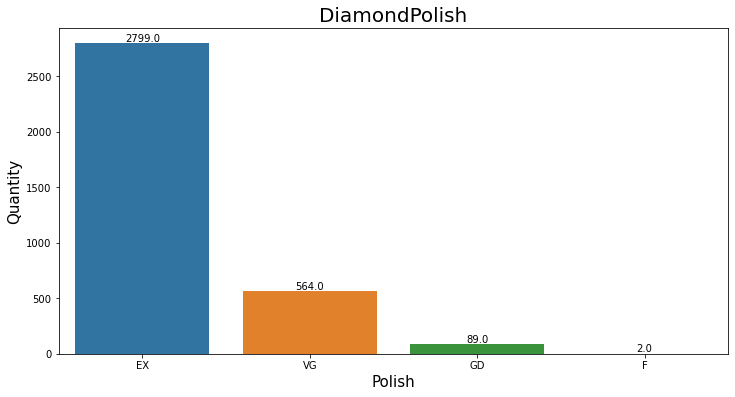

In [20]:
#diamonds polish
polish = data['Polish'].value_counts().to_frame().reset_index()
create_plots(polish, 'index', 'Polish')

## Most of the diamonds are Excellently Polished.

<Figure size 1080x1080 with 0 Axes>

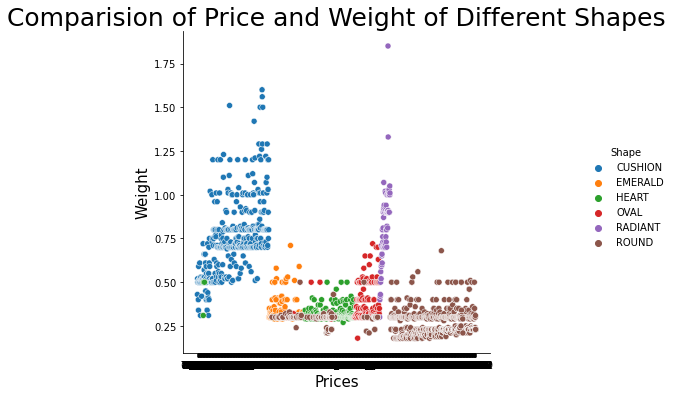

In [23]:
#Compare are weight and prices of different shapes of diamonds
plt.figure(figsize = (15,15))           #graph size
x = data['Weight'].value_counts().to_list()          # for x axis
y = data['Price'].value_counts().index.to_list()     # for y axis
sns.relplot(x='Price', y='Weight', hue='Shape', data = data)
plt.title('Comparision of Price and Weight of Different Shapes', size=25)      # graph title
plt.xlabel('Prices', size=15)
plt.ylabel('Weight', size=15)
plt.show()

## Through this comparision we can classify that the cushion shape has the least prices, on the other hand the round shape has the highest prices although they are lesser in weight as shown in the graph above.